# 1. Introduction 👋
In this analysis, we are working with a heart disease dataset, which includes various medical attributes collected from patients. The dataset contains 1,025 records with 14 columns, each representing different features related to heart health, such as age, sex, cholesterol levels, resting blood pressure, and whether or not the patient has heart disease (target).

The goal of this project is to explore the dataset, perform necessary preprocessing, and develop a predictive model using Python to identify whether a patient is at risk of heart disease. By analyzing these medical attributes, we aim to build a model that can assist healthcare professionals in making informed decisions and potentially improving patient outcomes.

The steps undertaken in this project include data cleaning, feature selection, model training, and evaluation. The Jupyter Notebook environment is used for all coding and analysis, utilizing libraries such as Pandas for data manipulation and machine learning libraries for model development.



# 2. Importing Libraries 📚
👉 **Importing libraries** that will be used in this notebook.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 3. Reading Data Set 👓
👉 After importing libraries, we will also **import the dataset** that will be used.

In [64]:
df_drug = pd.read_csv("heart.csv")

👉 Read the first 6 rows in the dataset.

In [65]:
df_drug.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

👉 Data type and checking null in dataset.

In [66]:
print(df_drug.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [67]:
df_drug.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

👉 From the results above, **there are no missing/null value** in this dataset

# 4. Initial Dataset Exploration 🔍
👉 This section will explore raw dataset that has been imported.

## 4.1 Categorical Variables 📊

👉 It can be seen that from results above, DrugY has more amount than other types of drugs

👉 The distribution of patient gender is balanced.

👉 The distribution of blood pressure level is balanced.

👉 The distribution of cholesterol level is balanced.

## 4.2 Numerical Variables 🔢
👉 This section will show mean, count, std, min, max and others using describe function. The skewness value for each numerical variables will also shown in this section.

In [71]:
df_drug.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [72]:
# 1. Handle Missing Values
# For categorical columns, fill with mode
#for column in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    #mode_val = df_drug[column].mode()[0]
    #df_drug[column].fillna(mode_val, inplace=True)

# For numerical columns, fill with median
for column in ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']:
    median_val = df_drug[column].median()
    df_drug[column].fillna(median_val, inplace=True)

check double values

In [73]:
df_drug.duplicated().sum()

723

In [74]:
df_drug.drop_duplicates(inplace=True)


C:\Users\O2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


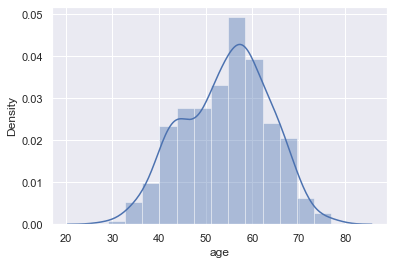

In [75]:
sns.distplot(df_drug['age']);

C:\Users\O2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


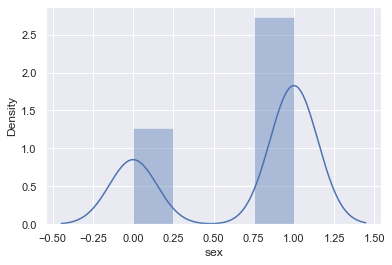

In [76]:
sns.distplot(df_drug['sex']);

👉The distribution of **'Age'** column is **symetric**, since the skewness value  between -0.5 and 0.5 <br>
👉The distribution of **'Na_to_K'** column is **moderately skewed**, since the skewness value is ***between 0.5 and 1***. It can also be seen from the histogram for 'Na_to_K' column

C:\Users\O2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


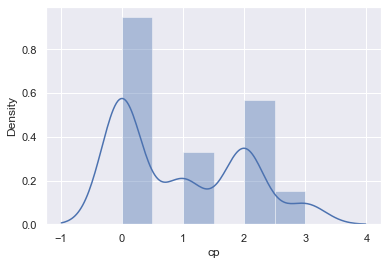

In [77]:
sns.distplot(df_drug['cp']);

C:\Users\O2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


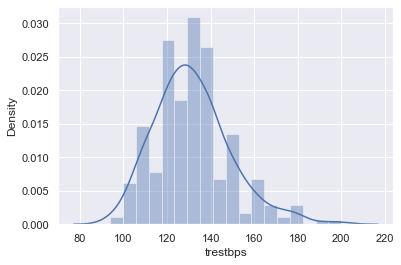

In [78]:
sns.distplot(df_drug['trestbps']);

C:\Users\O2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


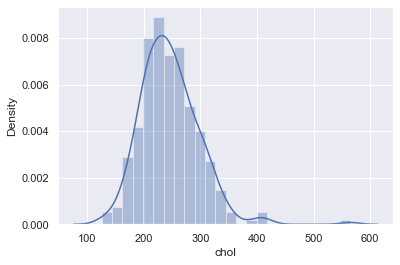

In [79]:
sns.distplot(df_drug['chol']);

C:\Users\O2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


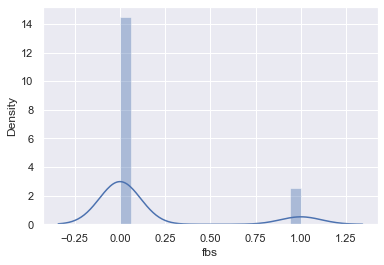

In [80]:
sns.distplot(df_drug['fbs']);

C:\Users\O2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


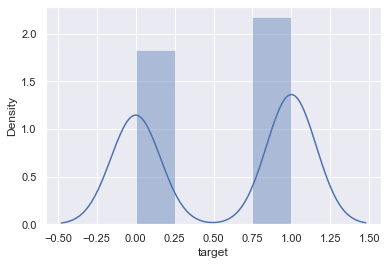

In [81]:
sns.distplot(df_drug['target']);

# 5. EDA 📊
👉 This section will explore variables in the dataset using different various plots/charts.

## 5.1 Drug Type Distribution 💊

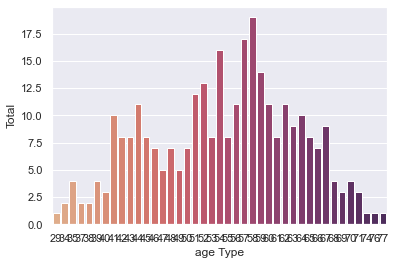

In [82]:
sns.set_theme(style="darkgrid")
sns.countplot(x="age", data=df_drug, palette="flare")
plt.xlabel('age Type')
plt.ylabel('Total')
plt.show()

## 5.2 Gender Distribution 👫

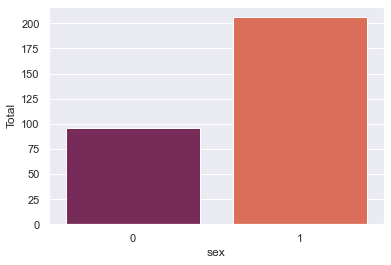

In [83]:
sns.set_theme(style="darkgrid")
sns.countplot(x="sex", data=df_drug, palette="rocket")
plt.xlabel('sex')
plt.ylabel('Total')
plt.show()

## 5.3 Blood Pressure Distribution 🩸

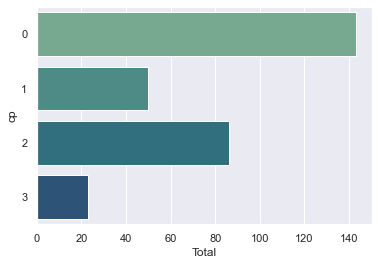

In [84]:
sns.set_theme(style="darkgrid")
sns.countplot(y="cp", data=df_drug, palette="crest")
plt.ylabel('cp')
plt.xlabel('Total')
plt.show()

## 5.4 Cholesterol Distribution 🥛

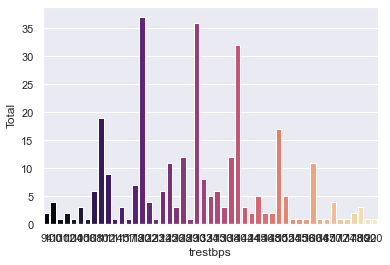

In [85]:
sns.set_theme(style="darkgrid")
sns.countplot(x="trestbps", data=df_drug, palette="magma")
plt.xlabel('trestbps')
plt.ylabel('Total')
plt.show()

## 5.5 Gender Distribution based on Drug Type 👫💊

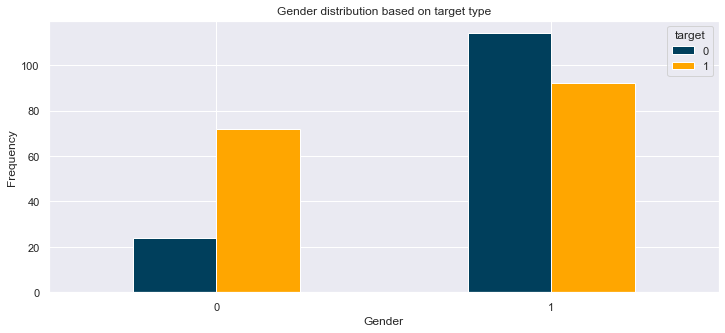

In [86]:
pd.crosstab(df_drug.sex,df_drug.target).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on target type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

## 5.6 Blood Pressure Distribution based on Cholesetrol 🩸🥛

## 5.7 Sodium to Potassium Distribution based on Gender and Age 🧪👫👴

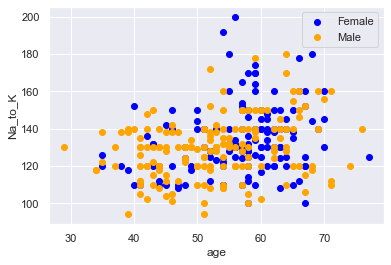

In [88]:
plt.scatter(x=df_drug.age[df_drug.target==0], y=df_drug.trestbps[(df_drug.target==0)], c="Blue")
plt.scatter(x=df_drug.age[df_drug.target==1], y=df_drug.trestbps[(df_drug.target==1)], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("age")
plt.ylabel("Na_to_K")
plt.show()

# 6. Dataset Preparation ⚙
👉 This section will prepare the dataset before building the machine learning models.

In [89]:
df_drug.describe()

age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

## 6.1 Data Binning 🚮

### 6.1.1 Age 👴
👉 The age will be divided into **7 age categories**:
*  Below 20 y.o.
*  20 - 29 y.o.
*  30 - 39 y.o.
*  40 - 49 y.o.
*  50 - 59 y.o.
*  60 - 69 y.o.
*  Above 70.

In [90]:
bin_age = [0, 40, 80, 120, 160, 200]
category_age = ['<40', '40-80', '80-120', '120-160', '>160']
df_drug['age_binned'] = pd.cut(df_drug['trestbps'], bins=bin_age, labels=category_age)
df_drug = df_drug.drop(['trestbps'], axis = 1)

### 6.1.2 Na_to_K 🧪
👉 The chemical ratio will be divided into **4 categories**:
*  Below 10.
*  10 - 20.
*  20 - 30.
*  Above 30.

In [91]:
df_drug.cp.value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

In [92]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df_drug['age_binned'] = pd.cut(df_drug['age'], bins=bin_NatoK, labels=category_NatoK)
df_drug = df_drug.drop(['age'], axis = 1)

## 6.2 Splitting the dataset 🪓
👉 The dataset will be split into **80% training and 20% testing**.

In [93]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [94]:
X = df_drug.drop(["slope"], axis=1)
y = df_drug["slope"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 6.3 Feature Engineering 🔧
👉 The FE method that used is **one-hot encoding**, which is **transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction**.

In [96]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [97]:
X_train.head()

sex  cp  chol  fbs  restecg  thalach  exang  oldpeak  ca  thal  target  \
163    1   0   274    0        0      166      0      0.5   0     3       0   
291    1   0   259    0        0      130      1      3.0   2     3       0   
280    0   1   234    0        0      175      0      0.6   0     2       1   
85     1   1   220    0        1      170      0      0.0   0     2       1   
239    0   0   244    0        1      154      1      1.4   0     2       0   

     age_binned_<10  age_binned_10-20  age_binned_20-30  age_binned_>30  
163               0                 0                 0               1  
291               0                 0                 0               0  
280               0                 0                 0               1  
85                0                 0                 0               1  
239               0                 0                 0               0

In [98]:
X_test.head()

sex  cp  chol  fbs  restecg  thalach  exang  oldpeak  ca  thal  target  \
245    1   1   219    0        0      188      0      0.0   0     2       1   
349    0   2   263    0        1       97      0      1.2   1     3       0   
135    0   0   225    1        0      146      1      2.8   2     1       0   
389    1   3   233    1        0      150      0      2.3   0     1       1   
66     1   2   197    1        0      152      0      1.2   0     2       1   

     age_binned_<10  age_binned_10-20  age_binned_20-30  age_binned_>30  
245               0                 0                 0               1  
349               0                 0                 0               0  
135               0                 0                 0               0  
389               0                 0                 0               0  
66                0                 0                 0               0

## save cleaned data

In [100]:
df_drug.to_csv("or.csv",index=False)

In [101]:
df_drug = pd.read_csv('or.csv')

              sex        cp      chol       fbs   restecg   thalach     exang  \
sex      1.000000 -0.051740 -0.195571  0.046022 -0.060351 -0.046439  0.143460   
cp      -0.051740  1.000000 -0.072682  0.096018  0.041561  0.293367 -0.392937   
chol    -0.195571 -0.072682  1.000000  0.011428 -0.147602 -0.005308  0.064099   
fbs      0.046022  0.096018  0.011428  1.000000 -0.083081 -0.007169  0.024729   
restecg -0.060351  0.041561 -0.147602 -0.083081  1.000000  0.041210 -0.068807   
thalach -0.046439  0.293367 -0.005308 -0.007169  0.041210  1.000000 -0.377411   
exang    0.143460 -0.392937  0.064099  0.024729 -0.068807 -0.377411  1.000000   
oldpeak  0.098322 -0.146692  0.050086  0.004514 -0.056251 -0.342201  0.286766   
slope   -0.032990  0.116854  0.000417 -0.058654  0.090402  0.384754 -0.256106   
ca       0.113060 -0.195356  0.086878  0.144935 -0.083112 -0.228311  0.125377   
thal     0.211452 -0.160370  0.096810 -0.032752 -0.010473 -0.094910  0.205826   
target  -0.283609  0.432080 

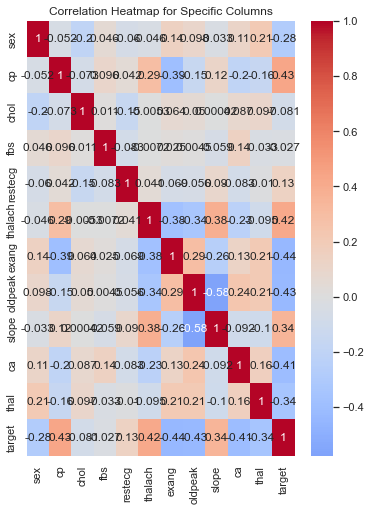

In [102]:
# Calculate correlation matrix for the specific columns
corr_matrix = df_drug.corr()
print(corr_matrix)
# Create a figure and set its size
plt.figure(figsize=(6, 8))

# Plot the correlation heatmap for the specific columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)

# Show the plot
plt.title('Correlation Heatmap for Specific Columns')
plt.show()


# 7. Models 🛠

## 7.1 Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=300)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 63.93%


In [104]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  6  3]
 [ 0 19  5]
 [ 0  8 20]]


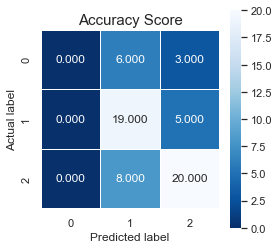

In [105]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

## save model

In [106]:
import joblib
model_filename = 'logistic_regression_model.joblib'
joblib.dump(LRclassifier, model_filename)
print(f"Model saved as {model_filename}")

Model saved as logistic_regression_model.joblib


## load and test model

In [107]:
# Load the saved model
import joblib
model_data = joblib.load(model_filename)
test = model_data.predict(X_test)
test


array([2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2], dtype=int64)

## 7.2 K Neighbours

In [108]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=3)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

[[ 2  4  3]
 [ 2 15  7]
 [ 0 13 15]]
K Neighbours accuracy is: 52.46%


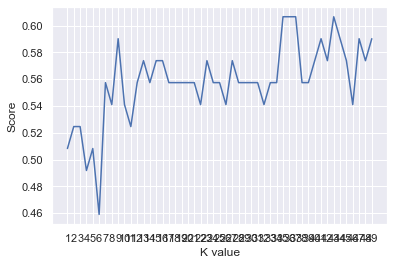

KNN Acc Max 60.66%


In [109]:
scoreListknn = []
for i in range(1,50):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,50), scoreListknn)
plt.xticks(np.arange(1,50,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

## 7.3 Support Vector Machine (SVM)

In [110]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=50)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

[[ 3  1  5]
 [12  1 11]
 [ 7  0 21]]
SVC accuracy is: 40.98%


C:\Users\O2\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## 7.5 Decision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=7)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

[[ 0  7  2]
 [ 0 21  3]
 [ 0 11 17]]
Decision Tree accuracy is: 62.30%


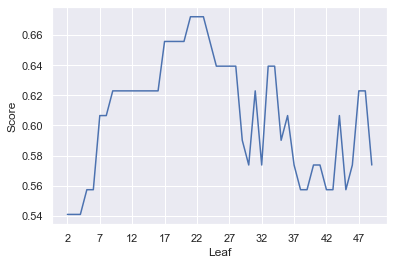

DT Acc Max 67.21%


In [48]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

## 7.6 Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=5)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

[[ 0  7  2]
 [ 0 22  2]
 [ 0  8 20]]
Random Forest accuracy is: 68.85%


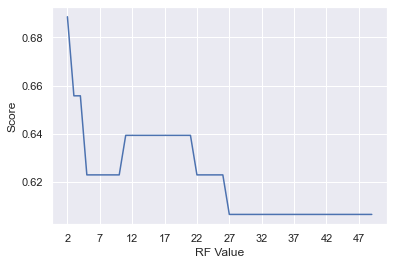

RF Acc Max 68.85%


In [50]:
scoreListRF = []
for i in range(2,50):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

# 8. Model Comparison 👀

In [114]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'K Neighbors Max', 'SVM','Decision Tree', 'Decision Tree Max', 'Random Forest', 'Random Forest Max'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, KNAccMax*100, SVCAcc*100, DTAcc*100, DTAccMax*100, RFAcc*100, RFAccMax*100]})
compare.sort_values(by='Accuracy', ascending=False)

Model   Accuracy
6        Random Forest  68.852459
7    Random Forest Max  68.852459
5    Decision Tree Max  67.213115
0  Logistic Regression  63.934426
4        Decision Tree  62.295082
2      K Neighbors Max  60.655738
1          K Neighbors  52.459016
3                  SVM  40.983607

👉 From the results, it can be seen that most of ML models can reach **up to 80% accuracy** in predicting classification of drug type.

# 10. References 🔗
📚 **Kaggle Notebook**:
*  [Drug Classification With Different Algorithms by Görkem Günay](https://www.kaggle.com/gorkemgunay/drug-classification-with-different-algorithms)
*  [Drug Classification - 100% Accuracy by Erin Ward](https://www.kaggle.com/eward96/drug-classification-100-accuracy)
*  [drug prediction with acc(100 %) by Sachin Sharma](https://www.kaggle.com/sachinsharma1123/drug-prediction-with-acc-100)